<a href="https://colab.research.google.com/github/RawBud11/Python/blob/main/MODELADO_Y_SIMULACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

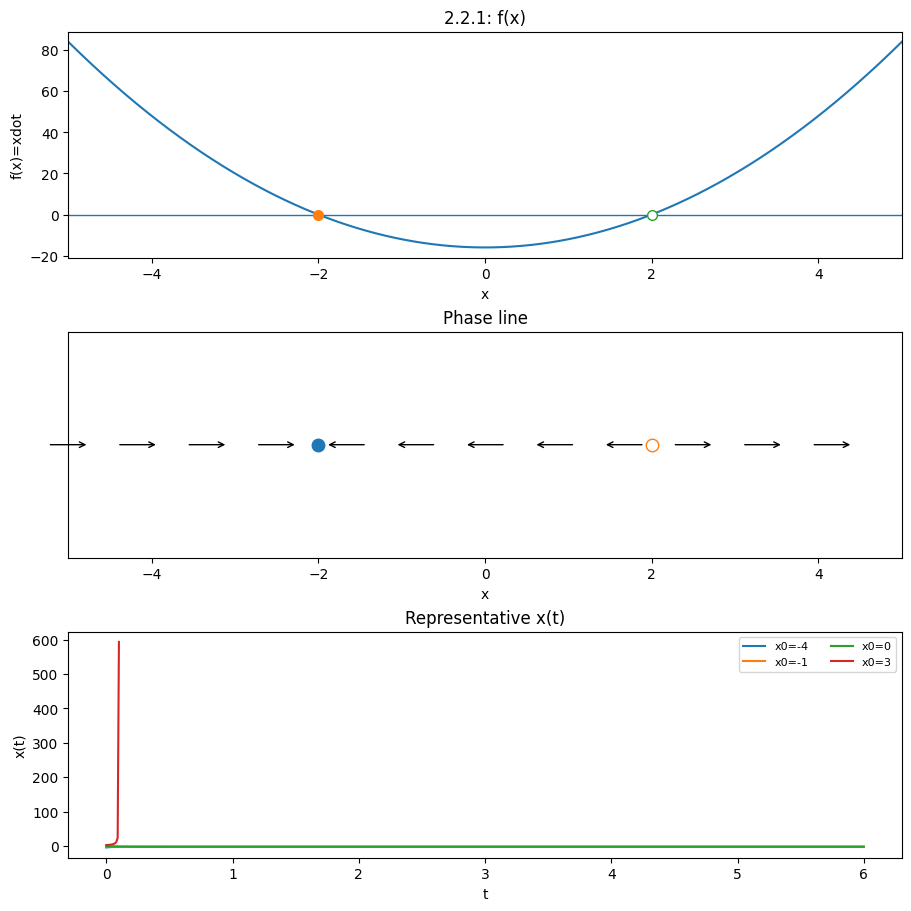

/tmp/ipython-input-2205608737.py:32: RuntimeWarning: overflow encountered in scalar power
  ("2.2.2", lambda x: 1-x**14,   lambda x: -14*x**13, [-1,1], (-2,2), [-1.5,-0.5,0.2,1.4], 6),


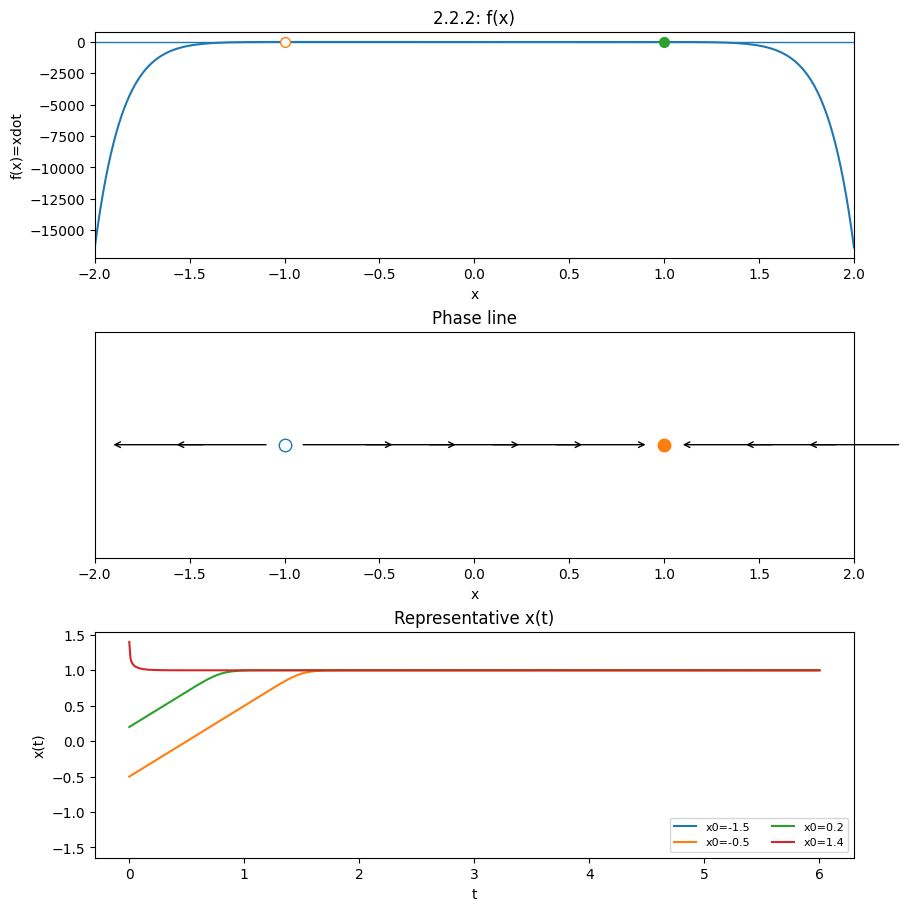

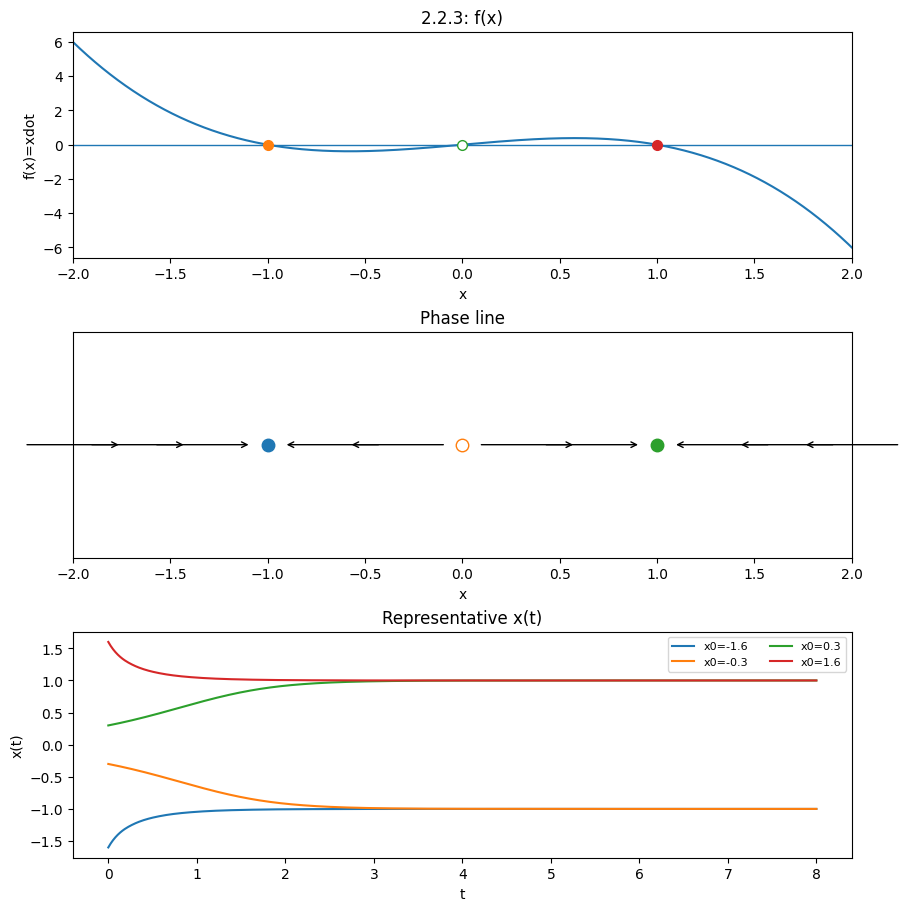

/tmp/ipython-input-2205608737.py:39: RuntimeWarning: overflow encountered in exp
  systems.append(("2.2.4", lambda x: np.exp(-x)*np.sin(x),
/tmp/ipython-input-2205608737.py:39: RuntimeWarning: invalid value encountered in sin
  systems.append(("2.2.4", lambda x: np.exp(-x)*np.sin(x),


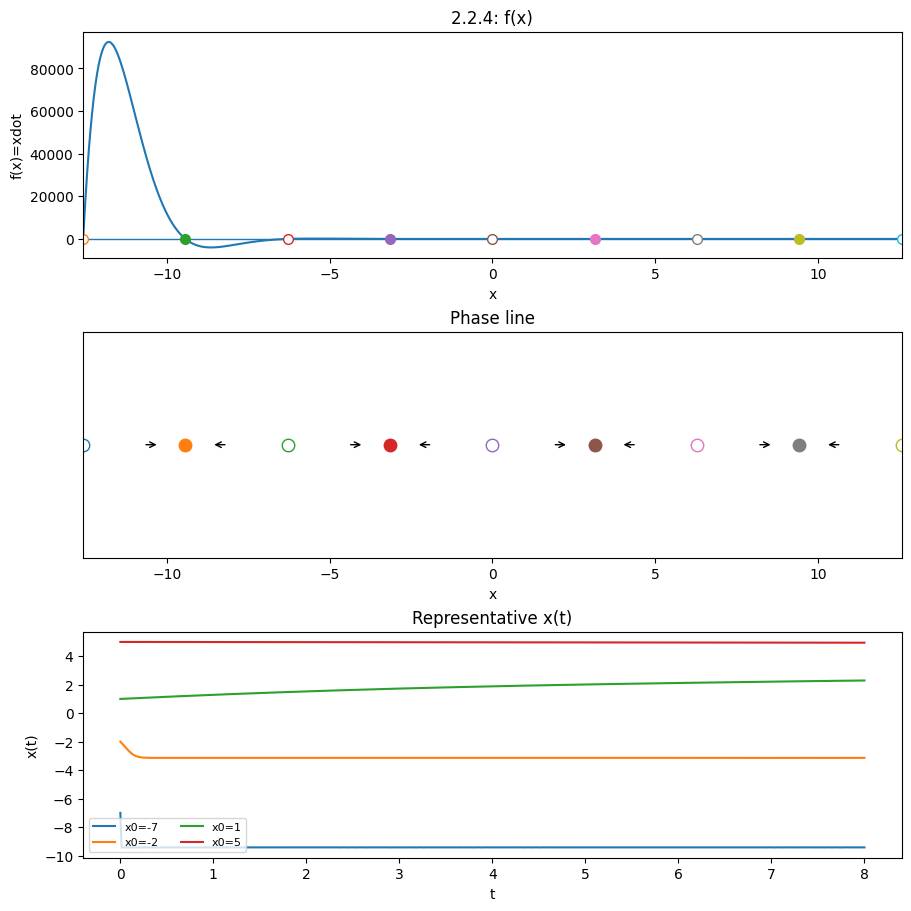

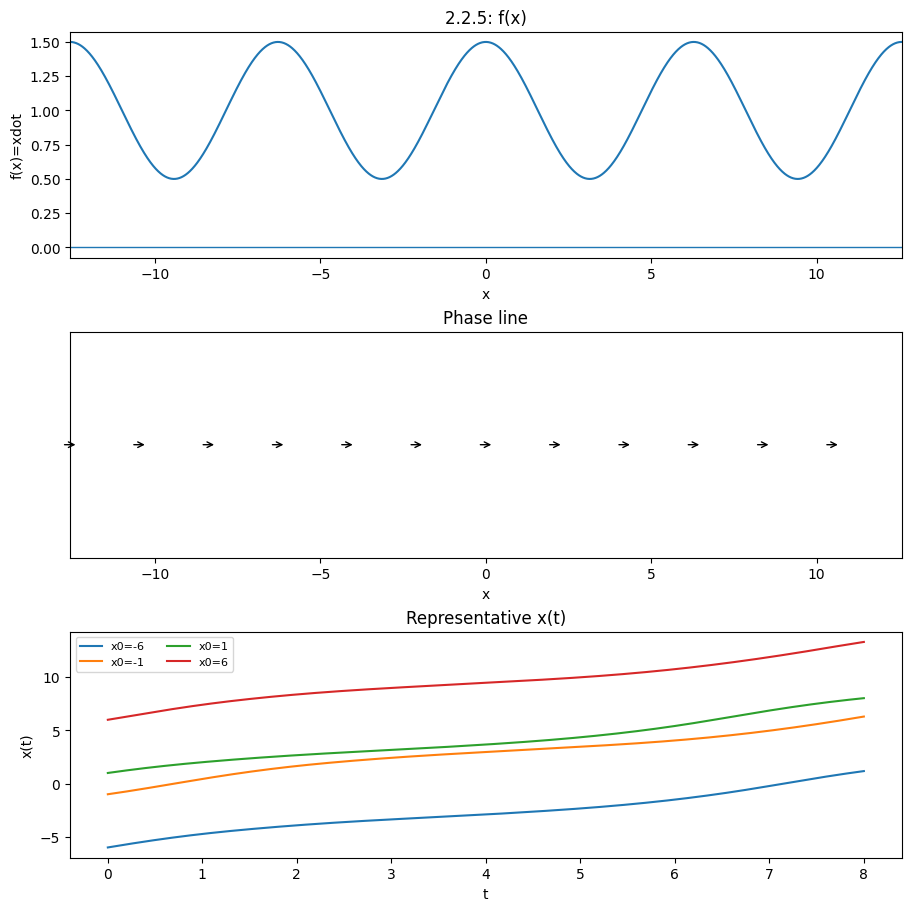

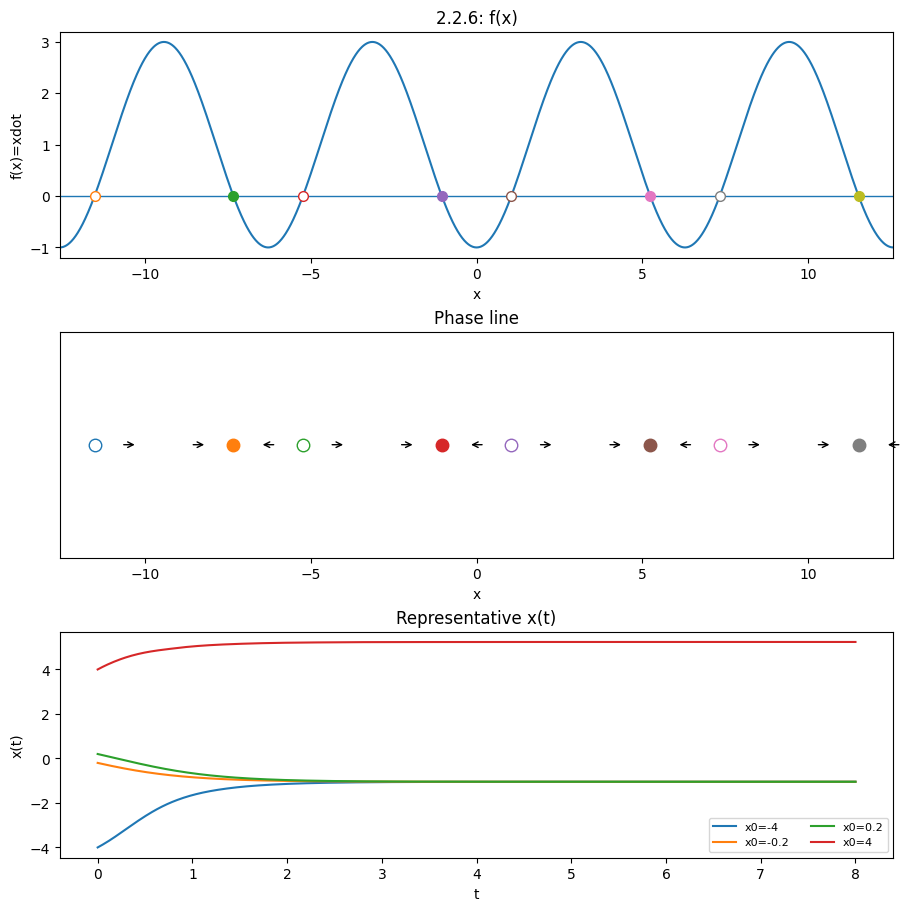

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.integrate import solve_ivp

def classify(fp):
    return "stable" if fp < 0 else ("unstable" if fp > 0 else "degenerate")

def phase_arrows(ax, f, xmin, xmax, fixed):
    xs = np.linspace(xmin, xmax, 13)
    for x in xs:
        if any(abs(x-a) < 0.12 for a in fixed):
            continue
        s = np.sign(f(x))
        if s == 0:
            continue
        ax.annotate("", (x+0.25*s, 0), (x-0.25*s, 0),
                    arrowprops=dict(arrowstyle="->", lw=1))
    ax.set(xlim=(xmin, xmax), ylim=(-1, 1), yticks=[], xlabel="x")

def xt_plot(ax, f, x0s, tmax):
    def rhs(t, y): return f(y[0])
    tt = np.linspace(0, tmax, 600)
    for x0 in x0s:
        sol = solve_ivp(rhs, (0, tmax), [x0], t_eval=tt)
        ax.plot(sol.t, sol.y[0], label=f"x0={x0:g}")
    ax.set(xlabel="t", ylabel="x(t)"); ax.legend(fontsize=8, ncol=2)

# Define the 6 systems (f, f', fixed points, range, initial conditions)
systems = [
 ("2.2.1", lambda x: 4*x**2-16, lambda x: 8*x, [-2,2], (-5,5), [-4,-1,0,3], 6),
 ("2.2.2", lambda x: 1-x**14,   lambda x: -14*x**13, [-1,1], (-2,2), [-1.5,-0.5,0.2,1.4], 6),
 ("2.2.3", lambda x: x-x**3,    lambda x: 1-3*x**2,  [-1,0,1], (-2,2), [-1.6,-0.3,0.3,1.6], 8),
]

# 2.2.4
xmin4, xmax4 = -4*pi, 4*pi
xstar4 = [k*pi for k in range(int(np.floor(xmin4/pi)), int(np.ceil(xmax4/pi))+1)]
systems.append(("2.2.4", lambda x: np.exp(-x)*np.sin(x),
                lambda x: np.exp(-x)*(np.cos(x)-np.sin(x)),
                xstar4, (xmin4,xmax4), [-7,-2,1,5], 8))

# 2.2.5
systems.append(("2.2.5", lambda x: 1+0.5*np.cos(x), lambda x: -0.5*np.sin(x),
                [], (-4*pi,4*pi), [-6,-1,1,6], 8))

# 2.2.6
xmin6, xmax6 = -4*pi, 4*pi
xstar6 = []
for k in range(-5, 6):
    xstar6 += [2*k*pi - pi/3, 2*k*pi + pi/3]
xstar6 = [x for x in sorted(xstar6) if xmin6 <= x <= xmax6]
systems.append(("2.2.6", lambda x: 1-2*np.cos(x), lambda x: 2*np.sin(x),
                xstar6, (xmin6,xmax6), [-4,-0.2,0.2,4], 8))

# Plot
for name, f, fp, fixed, (xmin,xmax), x0s, tmax in systems:
    xs = np.linspace(xmin, xmax, 2000)
    fig, ax = plt.subplots(3,1, figsize=(9,9), constrained_layout=True)

    ax[0].plot(xs, f(xs)); ax[0].axhline(0, lw=1)
    ax[0].set(xlim=(xmin,xmax), xlabel="x", ylabel="f(x)=xdot", title=f"{name}: f(x)")

    for a in fixed:
        s = classify(fp(a))
        if s == "stable":   ax[0].plot([a],[0],"o", ms=7)
        if s == "unstable": ax[0].plot([a],[0],"o", ms=7, mfc="white")

    phase_arrows(ax[1], lambda z: float(f(z)), xmin, xmax, fixed if fixed else [1e9])
    for a in fixed:
        s = classify(fp(a))
        if s == "stable":   ax[1].plot([a],[0],"o", ms=9)
        if s == "unstable": ax[1].plot([a],[0],"o", ms=9, mfc="white")
    ax[1].set_title("Phase line")

    xt_plot(ax[2], lambda z: float(f(z)), x0s, tmax)
    ax[2].set_title("Representative x(t)")

    plt.show()
